In [300]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale


# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [301]:
country_data = pd.read_csv("Country-data.csv")

In [302]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [303]:
print(len(country_data))

167


In [304]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [306]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


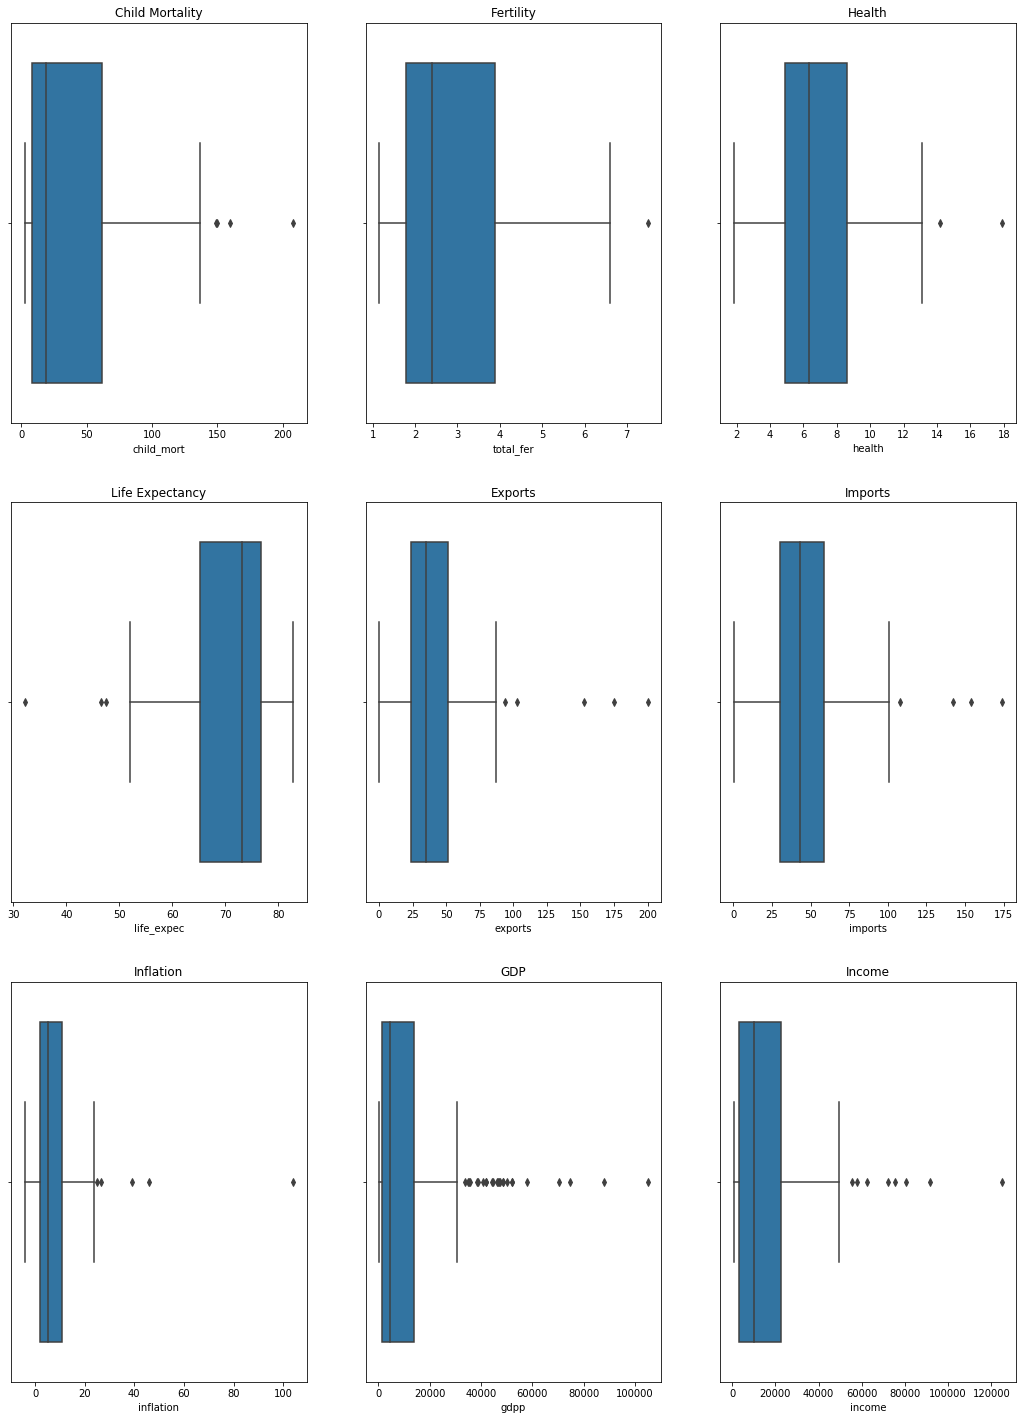

In [307]:
plt.figure(figsize=(18,25))

plt.subplot(3,3,1)
plt.title('Child Mortality')
sns.boxplot(x=country_data.child_mort)


plt.subplot(3,3,2)
plt.title('Fertility')
sns.boxplot(x=country_data.total_fer)


plt.subplot(3,3,3)
plt.title('Health')
sns.boxplot(x=country_data.health)

plt.subplot(3,3,4)
plt.title('Life Expectancy')
sns.boxplot(x=country_data.life_expec)

plt.subplot(3,3,5)
plt.title('Exports')
sns.boxplot(x=country_data.exports)


plt.subplot(3,3,6)
plt.title('Imports')
sns.boxplot(x=country_data.imports)


plt.subplot(3,3,7)
plt.title('Inflation')
sns.boxplot(x=country_data.inflation)

plt.subplot(3,3,8)
plt.title('GDP')
sns.boxplot(x=country_data.gdpp)

plt.subplot(3,3,9)
plt.title('Income')
sns.boxplot(x=country_data.income)

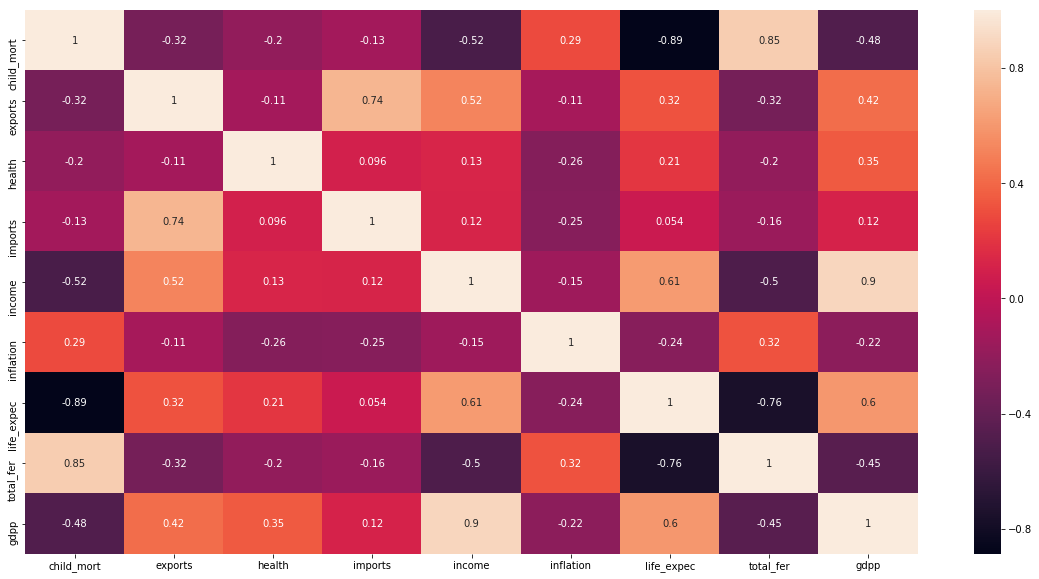

In [308]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        
sns.heatmap(country_data.corr(),annot = True)

In [309]:
# Checking the percentage of missing values
round(100*(country_data.isnull().sum()/len(country_data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [310]:
country_data.shape

(167, 10)

In [313]:
country_data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


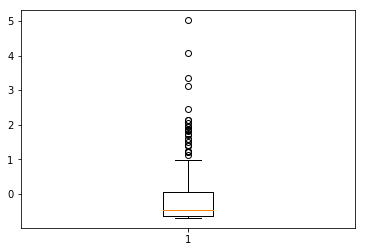

In [314]:
## Let's perform Outlier Analysis
plt.boxplot(country_data1.gdpp)
Q3 = country_data1.gdpp.quantile(0.95)
country_data1 = country_data[country_data.gdpp <= Q3]

In [315]:
country_data1.shape

(0, 10)

In [316]:
country_data1 =country_data.drop(['country'],1)

In [317]:
country_data1.shape

(167, 9)

In [319]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_data1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [320]:
# Normalising continuous features
df = country_data1[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [321]:
normalized_df=(df-df.mean())/df.std()
country_data1 = country_data1.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], 1)
country_data1 = pd.concat([country_data1,normalized_df],axis=1)
country_data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [322]:
country_data1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,1.555642e-16,-3.478588e-16,-1.403069e-15,3.463630e-16,-7.445807e-17,1.329608e-17,3.616535e-16,1.728491e-17,2.393295e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.844782e-01,-1.495694e+00,-1.822346e+00,-1.934123e+00,-8.577462e-01,-1.134440e+00,-4.324181e+00,-1.187678e+00,-6.947112e-01
25%,-7.443802e-01,-6.314377e-01,-6.901350e-01,-6.894051e-01,-7.153045e-01,-5.649418e-01,-5.909802e-01,-7.616117e-01,-6.347506e-01
50%,-4.703834e-01,-2.228576e-01,-1.804579e-01,-1.482972e-01,-3.726872e-01,-2.262699e-01,2.860972e-01,-3.553621e-01,-4.530683e-01
75%,5.908894e-01,3.735962e-01,6.495875e-01,4.898797e-01,2.933547e-01,2.807919e-01,7.021467e-01,6.156736e-01,5.924283e-02
max,4.208640e+00,5.796402e+00,4.035299e+00,5.250390e+00,5.594716e+00,9.102343e+00,1.376822e+00,3.000326e+00,5.021405e+00


In [323]:
country_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9)
memory usage: 11.8 KB



# PCA 

In [324]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [325]:
#Doing the PCA on the country data
pca.fit(country_data1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [326]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [327]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

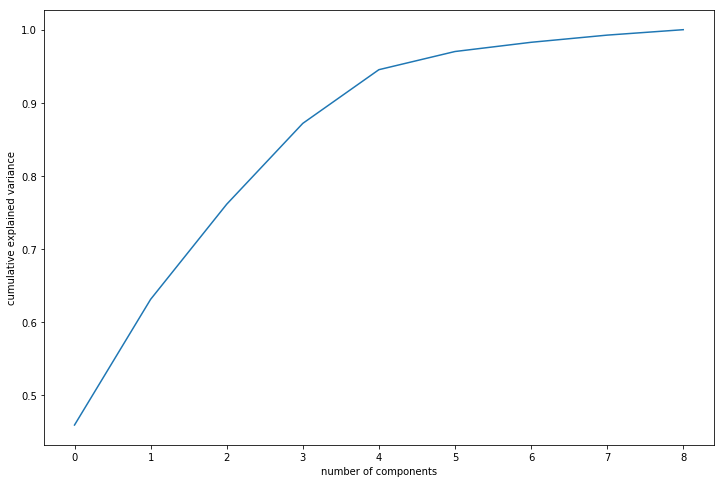

In [329]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [330]:
#Understanding how the original 4 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(country_data1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.419519,0.192884,-0.029544,0.370653
1,exports,0.283897,0.613163,0.144761,0.003091
2,health,0.150838,-0.243087,-0.596632,0.461897
3,imports,0.161482,0.671821,-0.299927,-0.071907
4,income,0.398441,0.022536,0.301548,0.392159
5,inflation,-0.193173,-0.008404,0.642520,0.150442
6,life_expec,0.425839,-0.222707,0.113919,-0.203797
7,total_fer,-0.403729,0.155233,0.019549,0.378304
8,gdpp,0.392645,-0.046022,0.122977,0.531995


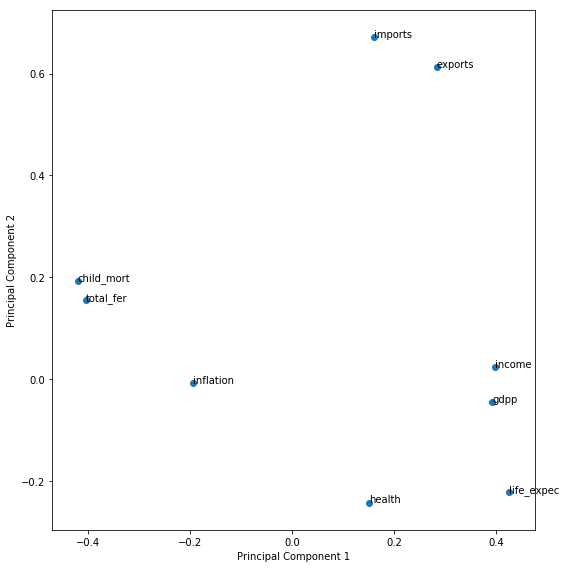

In [331]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

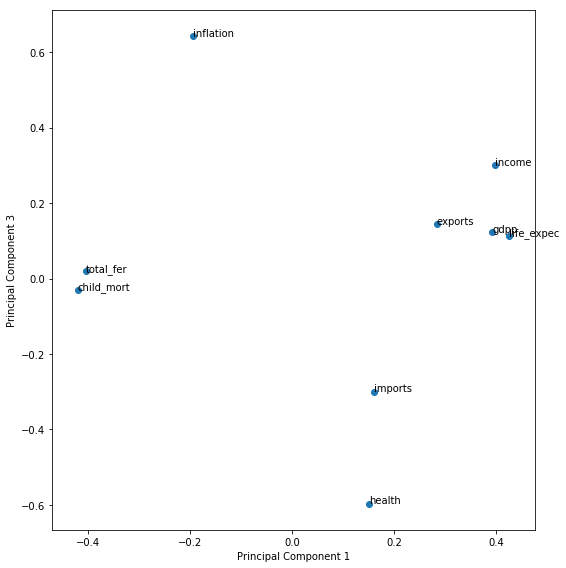

In [390]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC3[i]))
plt.tight_layout()
plt.show()

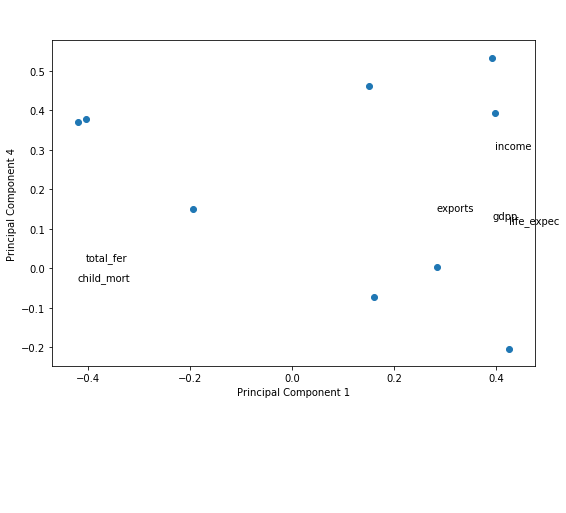

In [391]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC4)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC3[i]))
plt.tight_layout()
plt.show()

In [332]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [333]:
df_train_pca = pca_final.fit_transform(country_data1)
df_train_pca.shape

(167, 4)

In [334]:
df_train_pca

array([[-2.90504953e+00,  8.80889580e-02,  7.18841261e-01,
         9.93710369e-01],
       [ 4.28070135e-01, -5.86096292e-01,  3.20089646e-01,
        -1.16768097e+00],
       [-2.82139745e-01, -4.45317863e-01, -1.22146183e+00,
        -8.47577887e-01],
       [-2.92218008e+00,  1.69434077e+00, -1.51717157e+00,
         8.73339848e-01],
       [ 1.02889318e+00,  1.30096737e-01,  1.92343951e-01,
        -8.42274895e-01],
       [ 2.83846572e-02, -1.75145297e+00, -7.91140619e-01,
        -5.23290042e-02],
       [-1.02540528e-01, -5.65774300e-01, -2.76836260e-01,
        -1.45394825e+00],
       [ 2.33244068e+00, -1.99212821e+00, -2.36341207e-01,
         1.12909454e+00],
       [ 2.96494167e+00, -7.32646016e-01,  5.46776474e-01,
         1.18898493e+00],
       [-1.79466250e-01, -3.92571564e-01, -8.61663738e-01,
        -4.25377273e-01],
       [ 1.26227794e+00, -6.63093362e-01,  4.52173180e-01,
         5.93004990e-02],
       [ 1.66572736e+00,  5.58713689e-01, -1.01710933e+00,
      

In [335]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [336]:
corrmat

array([[ 1.00000000e+00, -8.02108894e-06,  1.19619251e-03,
        -5.32699469e-04],
       [-8.02108894e-06,  1.00000000e+00,  8.75344425e-04,
        -1.09663258e-04],
       [ 1.19619251e-03,  8.75344425e-04,  1.00000000e+00,
        -2.03782954e-03],
       [-5.32699469e-04, -1.09663258e-04, -2.03782954e-03,
         1.00000000e+00]])

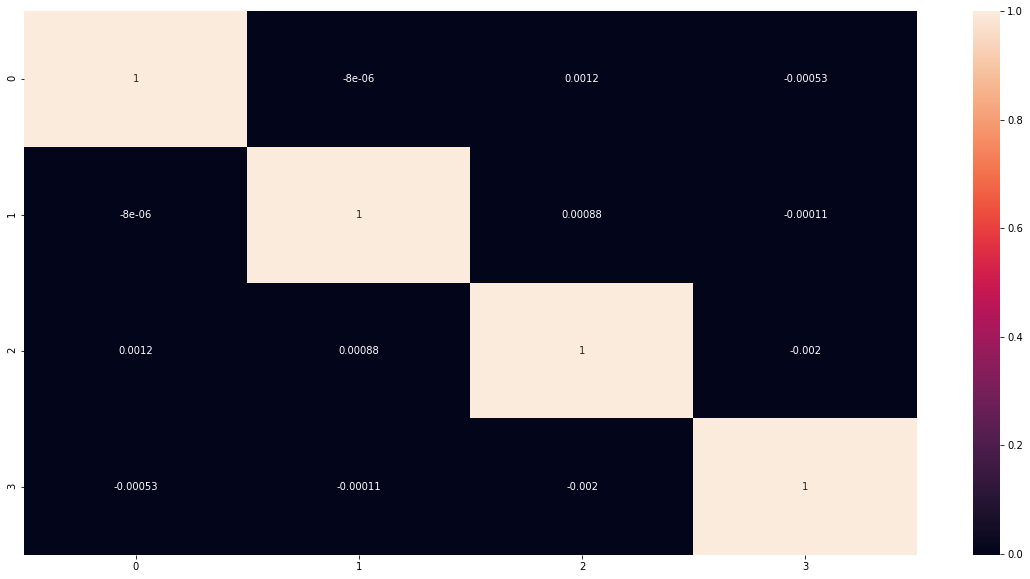

In [337]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [338]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092543056 , min corr:  -0.0020378295355501573


In [339]:
#df_train_pca
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_train_pca)

In [340]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
pcs_df2.head()

,PC1,PC2,PC3,PC4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


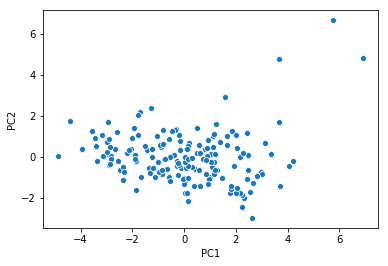

In [341]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

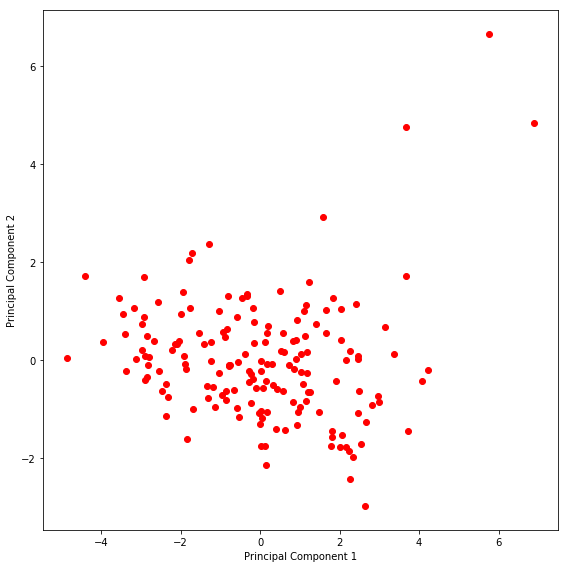

In [342]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1],color=['red'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

## Clustering 

In [343]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [344]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.8546284248641633

In [345]:
#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [346]:
dat3_1 = pcs_df2

### K- means Clustering

In [347]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

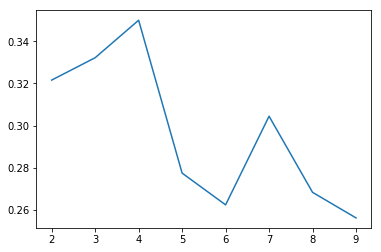

In [348]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Sum of Squared Distances

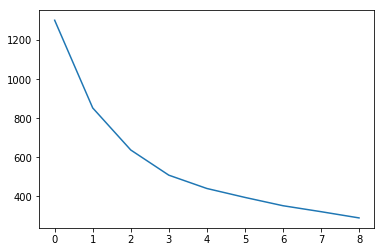

In [349]:
## From the above analysis we find that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [350]:
#Here also we're seeing a distinct bend at around 4 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=4
model_clus2 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [351]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,ClusterID
0,-2.905050,0.088089,0.718841,0.993710,1
1,0.428070,-0.586096,0.320090,-1.167681,2
2,-0.282140,-0.445318,-1.221462,-0.847578,2
3,-2.922180,1.694341,-1.517172,0.873340,1
4,1.028893,0.130097,0.192344,-0.842275,2
5,0.028385,-1.751453,-0.791141,-0.052329,2
6,-0.102541,-0.565774,-0.276836,-1.453948,2
7,2.332441,-1.992128,-0.236341,1.129095,0
8,2.964942,-0.732646,0.546776,1.188985,0
9,-0.179466,-0.392572,-0.861664,-0.425377,2


In [352]:
dat_km['ClusterID'].value_counts()

2    86
1    47
0    31
3     3
Name: ClusterID, dtype: int64

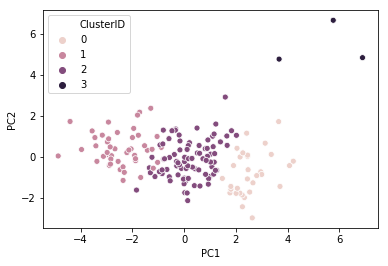

In [353]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [354]:
dat5=pd.merge(country_data,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.905050,0.088089,0.718841,0.993710,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.428070,-0.586096,0.320090,-1.167681,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282140,-0.445318,-1.221462,-0.847578,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.922180,1.694341,-1.517172,0.873340,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.028893,0.130097,0.192344,-0.842275,2


In [355]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


## Analysis of the clusters

In [356]:
clu_child_mort = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exports= 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [357]:
df = pd.concat([pd.Series([0,1,2,3]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)

In [358]:
df.columns = ["ClusterID","clu_child_mort","clu_exports","clu_health","clu_imports","clu_income","clu_inflation","clu_life_expec","clu_total_fer","clu_gdpp"]
df

,ClusterID,clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp
0,0,4.903226,46.477419,9.127097,40.483871,44703.225806,2.607613,80.283871,1.786129,42574.193548
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,21.598837,41.003360,6.216744,47.865883,12790.348837,7.516291,72.882558,2.295581,6769.325581
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


In [393]:
dat6['ClusterID'].value_counts()

2    86
1    47
0    31
3     3
Name: ClusterID, dtype: int64

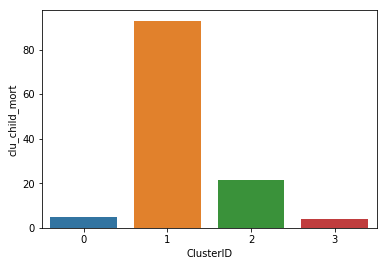

In [359]:
sns.barplot(x=df.ClusterID, y=df.clu_child_mort)

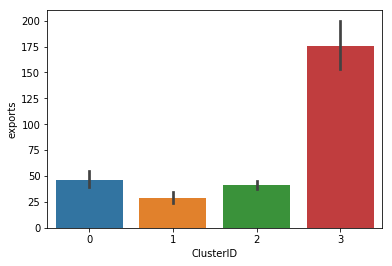

In [360]:
sns.barplot(x=dat6.ClusterID, y=dat6.exports)

In [361]:
f_exports=dat6[dat6['ClusterID']==3]
f_exports

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3


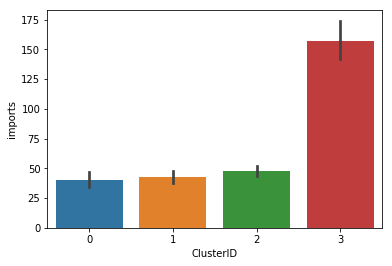

In [362]:
sns.barplot(x=dat6.ClusterID, y=dat6.imports)

In [396]:
f_health=dat6[dat6['ClusterID']==0]
f_health.shape
f_health

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,0


In [364]:
f_income=dat6[dat6['ClusterID']==2]
f_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,2
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,2
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,2
10,Bahamas,13.8,35.00,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,69.50,4.97,50.9,41100,7.440,76.0,2.16,20700,2
12,Bangladesh,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758,2
13,Barbados,14.2,39.50,7.97,48.7,15300,0.321,76.7,1.78,16000,2


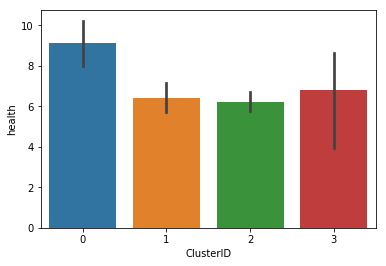

In [365]:
sns.barplot(x=dat6.ClusterID, y=dat6.health)

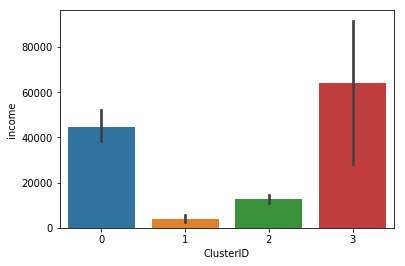

In [366]:
sns.barplot(x=dat6.ClusterID, y=dat6.income)

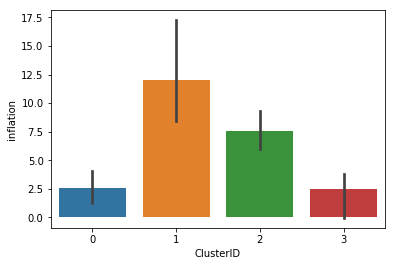

In [367]:
sns.barplot(x=dat6.ClusterID, y=dat6.inflation)

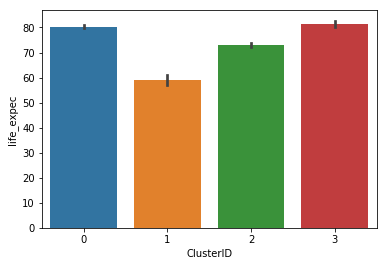

In [368]:
sns.barplot(x=dat6.ClusterID, y=dat6.life_expec)

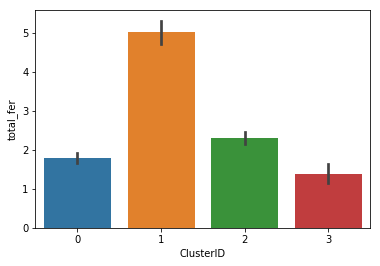

In [369]:
sns.barplot(x=dat6.ClusterID, y=dat6.total_fer)

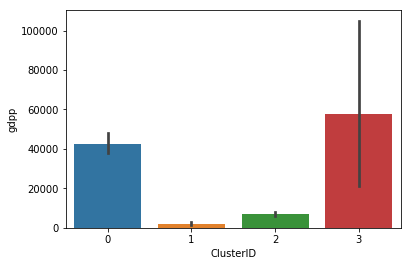

In [370]:
sns.barplot(x=dat6.ClusterID, y=dat6.gdpp)

In [ ]:
#                            Cluster 1	Cluster 2	Cluster 3	Cluster 4
#                                31	        47	       86	       3
#Child Mortality             	Low       High     	Moderate	Low
#Life Expectancy             	High	    Low	      Moderate   High
#Health Spending	           High	       Moderate	   Moderate	  Moderate
#Fertility	                    Moderate	High	   Moderate	   Low
#GDPP	                        Moderate	 Low	     Low	  High
#income                         Moderate    Low      Moderate    High
#Export	                        Low     	Low     	 Low	   High
#Import	                        Moderate	Moderate	 Moderate	High
#Inflation	                    Moderate	High	        High	Low    
#					
#Cluster 1 Low Funding	
#Cluster 2 High Funding	
#Cluster 3 Moderate Funding	
#Cluster 4 No Funding	




In [371]:
f_gdpp=dat6[dat6['ClusterID']==1]
f_gdpp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In [372]:
f_gdpp.sort_values(by='gdpp')


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,1
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,1
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,1


## Heirarchical Clustering


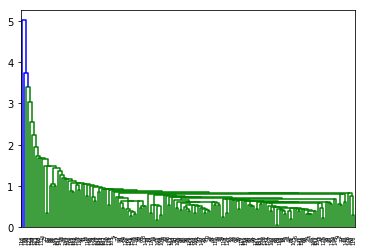

In [373]:
# heirarchical clustering
mergings = linkage(pcs_df2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

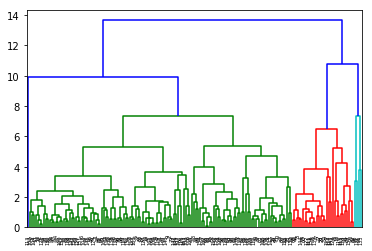

In [374]:
mergings = linkage(pcs_df2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [375]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
clus_hc = pd.concat([country_data, clusterCut], axis=1)
clus_hc.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']
clus_hc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [376]:
#summarise
hrclu_child_mort = 	pd.DataFrame(clus_hc.groupby(["ClusterID"]).child_mort.mean())
hrclu_exports= 	pd.DataFrame(clus_hc.groupby(["ClusterID"]).exports.mean())
hrclu_health = 	pd.DataFrame(clus_hc.groupby(["ClusterID"]).health.mean())
hrclu_imports = 	pd.DataFrame(clus_hc.groupby(["ClusterID"]).imports.mean())
hrclu_income = 	pd.DataFrame(clus_hc.groupby(["ClusterID"]).income.mean())
hrclu_inflation = 	pd.DataFrame(clus_hc.groupby(["ClusterID"]).inflation.mean())
hrclu_life_expec = 	pd.DataFrame(clus_hc.groupby(["ClusterID"]).life_expec.mean())
hrclu_total_fer = 	pd.DataFrame(clus_hc.groupby(["ClusterID"]).total_fer.mean())
hrclu_gdpp = 	pd.DataFrame(clus_hc.groupby(["ClusterID"]).gdpp.mean())

In [377]:
dfhr = pd.concat([pd.Series([0,1,2,3]),clu_child_mort,hrclu_exports,hrclu_health,hrclu_imports,hrclu_income,hrclu_inflation,hrclu_life_expec,hrclu_total_fer,hrclu_gdpp], axis=1)
dfhr.columns = ["ClusterID","clu_child_mort","clu_exports","clu_health","clu_imports","clu_income","clu_inflation","clu_life_expec","clu_total_fer","clu_gdpp"]
dfhr.head()

,ClusterID,clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp
0,0,4.903226,36.311443,6.417634,46.126457,9310.022901,8.090450,68.164122,3.206794,5222.015267
1,1,92.961702,47.138710,8.666452,38.474194,45996.774194,4.274935,79.841935,1.937742,41777.419355
2,2,21.598837,155.450000,5.945000,144.500000,53125.000000,0.798500,79.425000,1.577500,45875.000000
3,3,4.133333,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


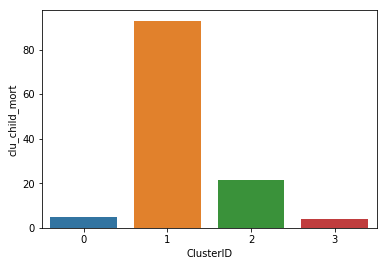

In [378]:
sns.barplot(x=dfhr.ClusterID, y=dfhr.clu_child_mort)

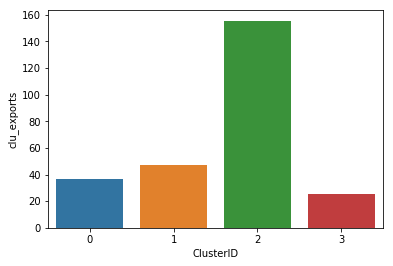

In [379]:
sns.barplot(x=dfhr.ClusterID, y=dfhr.clu_exports)

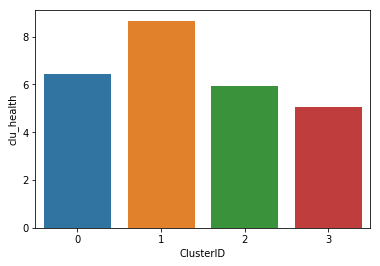

In [380]:
sns.barplot(x=dfhr.ClusterID, y=dfhr.clu_health)

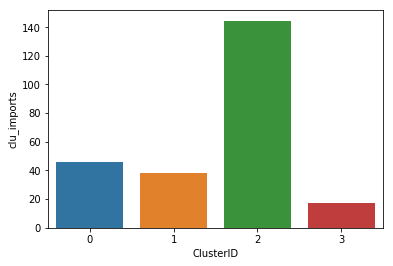

In [381]:
sns.barplot(x=dfhr.ClusterID, y=dfhr.clu_imports)

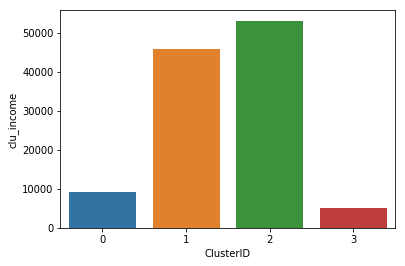

In [382]:
sns.barplot(x=dfhr.ClusterID, y=dfhr.clu_income)

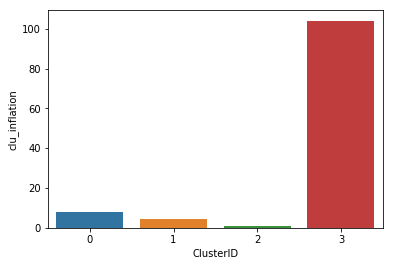

In [383]:
sns.barplot(x=dfhr.ClusterID, y=dfhr.clu_inflation)

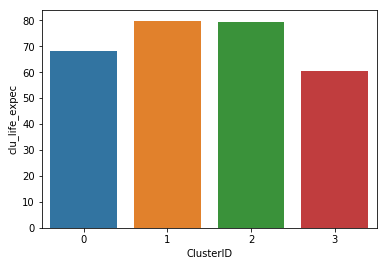

In [384]:
sns.barplot(x=dfhr.ClusterID, y=dfhr.clu_life_expec)

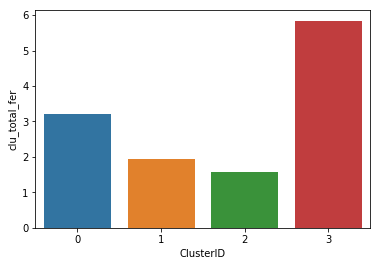

In [385]:
sns.barplot(x=dfhr.ClusterID, y=dfhr.clu_total_fer)

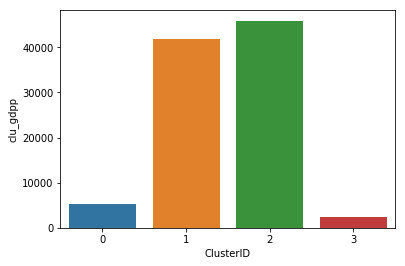

In [386]:
sns.barplot(x=dfhr.ClusterID, y=dfhr.clu_gdpp)

In [387]:
f_gdpp1=clus_hc[clus_hc['ClusterID']==3]
f_gdpp1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,3


In [397]:
f_gdpp_one=clus_hc[clus_hc['ClusterID']==1]
f_gdpp_one

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1


In [398]:
f_gdpp_two=clus_hc[clus_hc['ClusterID']==2]
f_gdpp_two

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2


In [401]:
f_gdpp_three=clus_hc[clus_hc['ClusterID']==3]
f_gdpp_three

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,3


In [400]:
f_gdpp2=clus_hc[clus_hc['ClusterID']==1]
f_gdpp2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1


In [389]:
f_gdpp2.sort_values(by='gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,0


In [ ]:
#                            Cluster 1	Cluster 2	Cluster 3	Cluster 4
#                                31	        47	       86	       3
#Child Mortality             	Low       High     	Moderate	Low
#Life Expectancy             	Moderate	 High	  High    Moderate
#Health Spending	           Moderate	       High	   Moderate	  Moderate
#Fertility	                    Moderate	Low	       Low	   High
#GDPP	                        Low	         High	   High	  Low
#income                         Moderate     High      High   Low
#Export	                        Low     	Low     	 High	   Low
#Import	                        Moderate	Moderate	 High	Low
#Inflation	                    Moderate	Low	        Low	High    
#					
#Cluster 1 High Funding	
#Cluster 2 Low Funding	
#Cluster 3 No Funding	
#Cluster 4 Moderate Funding	
